In [7]:
from tqdm import tqdm
import pickle
import pandas as pd
from pathlib import Path
import numpy as np
import scipy
import copy
import sys
import os
from typing import Optional, Union, Sequence, Mapping, List, Set
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d

import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

sys.path.append('/mnt/c/Users/lslat/Code/')
sys.path.append('/mnt/c/Users/lslat/QiskitProjects/VariationalWavefunction/')

from quantum_kernel.code.utils import get_dataset
from quantum_kernel.code.visualization_utils import aggregate_shapes,filter_df
from quantum_kernel.code.kernel_measures.kernel_geometry import purity_average, purity_of_average
from quantum_kernel.code.kernel_measures.eigenvalue_scaling import get_eigenvalue_scaling,compute_dataframe_kernel_eigenvalues

font = {'family': 'DejaVu Sans',
        'weight': 'bold',
        'size': 30}

rc('font', **font)

tqdm.pandas()
warnings.filterwarnings("ignore")


In [8]:
# Get kernel results for the different ml models and dataset.d
dfs = {}

folders = [
    ("/mnt/c/Users/lslat/Data/QK_project/results/HZZ_multi/final_gennorm/just_iqp_interaction/beta1.0/",'HZZ_Multi'),
]

cols_to_drop=['qkern_matrix_train', 'args', 'K_train_time', 'rdms', 
'samples', 'mu','sigma', 'outpath','seed', 'projected']

for folder,prefix in folders:
    if prefix in dfs:
        temp = aggregate_shapes(folder,prefix,cols_to_drop=cols_to_drop)
        dfs[prefix] = pd.concat([dfs[prefix], temp])
    else:
        dfs[prefix] = aggregate_shapes(folder,prefix,cols_to_drop=cols_to_drop)

In [9]:
save_folder='/mnt/c/Users/lslat/Data/QK_project/results/figs/'

In [10]:
hzz_df=dfs['HZZ_Multi']

In [11]:
q_iqp_df=hzz_df[(hzz_df['h_layer']==1) & (hzz_df['non_data_int_scaling_factor']==0.0) & (hzz_df['scaling_factor']==0.0)]
c_iqp_df=hzz_df[(hzz_df['h_layer']==0) & (hzz_df['non_data_int_scaling_factor']==0.0) & (hzz_df['scaling_factor']==0.0)]

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


NameError: name 'line' is not defined

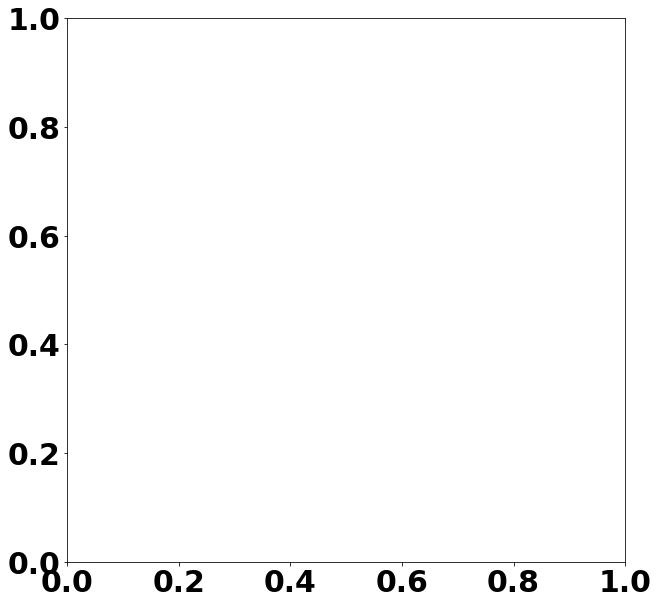

In [12]:
colormap=cm.viridis
gammas=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
alpha=2.0
beta=1.0
fig, axs = plt.subplots(1,figsize=(10,10))
ax=axs
filter={'beta': beta,'alpha': alpha}

quantum_df=filter_df(q_iqp_df,filter)
classical_df=filter_df(c_iqp_df,filter)

lines=[]
handles=[]
for gamma in gammas:
    test_sfs=list(set(quantum_df.int_scaling_factor))
    test_sfs.sort()
    q_curve=get_eigenvalue_scaling(quantum_df,gamma,test_sfs,key='int_scaling_factor')
    test_sfs=list(set(classical_df.int_scaling_factor))
    test_sfs.sort()
    c_curve=get_eigenvalue_scaling(classical_df,gamma,test_sfs,key='int_scaling_factor')
    label=r'$\gamma_{max}$='+str(gamma)
    color=colormap(gamma)
    try:
        line=ax.errorbar(q_curve[:,0],q_curve[:,1],label=label,color=color,fmt='-o')
        lines.append(line[0])

    except:
        pass
    #_=ax.errorbar(c_curve[:,0],c_curve[:,1],color=color,ls='-.')
    handles.append(label)

ax.set_xlabel('Dataset dimension')
ax.set_ylabel('IQP int scaling factor')
ax.set_xlim([4,20])
#ax.set_ylim([10**(-1),2*10**0])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title(r'$\beta$='+str(beta)+r', $\alpha$='+str(alpha))

fig.legend(lines,handles,bbox_to_anchor=(0.95,0.8),fontsize=18,ncol=2)
lines=[
Line2D([0,0],[0.1,1],ls='-.',color=colormap(0.2)),
Line2D([0,0],[0.1,1],ls='-',color=colormap(0.2))
]
extra_legend = plt.legend(lines, ["classical","quantum"], loc=1,fontsize=18)
fig.tight_layout()
#fig.savefig(f'{save_folder}IQP_fixed_gamma_decay_curves_plots.png')

In [ ]:
q_curve

array([], dtype=float64)

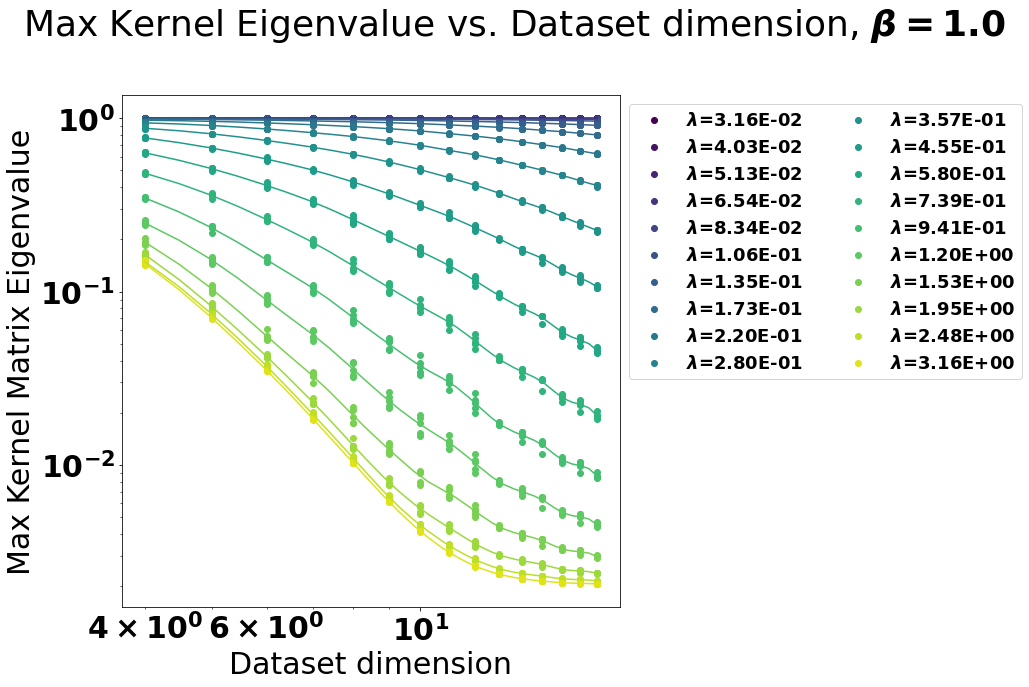

In [ ]:
colormap=cm.viridis

beta=1.0
alpha=2.0
filter={'beta': beta,'alpha':alpha}

quantum_df=filter_df(q_iqp_df,filter)
test_sfs=list(set(quantum_df.int_scaling_factor))
test_sfs.sort()
fig, axs = plt.subplots(1,figsize=(15,10))
ax=axs
for i,sf in enumerate(test_sfs):
    color=colormap(i/len(test_sfs))
    label=r'$\lambda$={:.2E}'.format(sf)
    q_df=quantum_df[(quantum_df['int_scaling_factor']==sf)]
    x=q_df.dataset_dim
    y=q_df.apply(lambda x: max(x.kernel_eigenvalues),axis=1)
    ax.scatter(x,y,color=color,label=label)
    x2=np.array(list(set(x.values)))

    #popt,pcov=scipy.optimize.curve_fit(lambda t,a,b: np.log(a*np.exp(b*t)),  x,  np.log(y))
    #y2=popt[0]*np.exp(popt[1]*x2)

    #popt,pcov=scipy.optimize.curve_fit(lambda t,a,b,c: np.log(a*np.exp(-b*t)+c),  x,  np.log(y),bounds=(0, [1.0, 2.0, 0.5]))
    popt,pcov=scipy.optimize.curve_fit(lambda t,a,b,c,d: np.log(a*np.exp(-b*t)+c+d*x),  x,  np.log(y),bounds=([0,0,0,-2], [1.0, 2.0, 0.5,2]),p0=[1,0,0,0])
    y2=popt[0]*np.exp(-popt[1]*x2)+popt[2]+popt[3]*x2

    #ax.plot(x2,y2,color=color)

    x3=x.values
    y3=y.values
    points=np.array(list(zip(x3,y3)))
    
    new_x=list(set(points[:,0]))
    new_y=[np.mean([point[1] for point in points if point[0]==x]) for x in new_x]

    f2=interp1d(new_x,new_y,kind='cubic')
    x4=np.linspace(min(new_x),max(new_x),30)
    ax.plot(x4,f2(x4),color=color)

ax.legend(bbox_to_anchor=(1,1),ncol=2,fontsize=18)
ax.set_xlabel('Dataset dimension')
ax.set_ylabel('Max Kernel Matrix Eigenvalue')
ax.set_xscale('log')
ax.set_yscale('log')
fig.suptitle(rf'Max Kernel Eigenvalue vs. Dataset dimension, $\beta = {beta}$')
fig.tight_layout()
#fig.savefig(f'{save_folder}quantum_IQP_eigenvalue_decay_curves_plots_beta_{beta}.png')

In [ ]:
x2=x.values
y2=y.values

In [ ]:
points=np.array(list(zip(x2,y2)))

In [ ]:
new_x=list(set(points[:,0]))
new_y=[np.mean([point[1] for point in points if point[0]==x]) for x in new_x]

In [ ]:
f2=interp1d(new_x,new_y,kind='cubic')

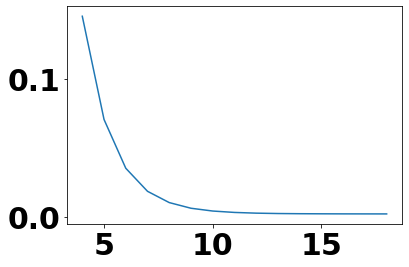

In [ ]:
new_x
plt.plot(new_x,f2(new_x))